## Some findings from Stack Overflow Data 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./data/survey_results_public.csv')

### 1. Business Understanding

Stack Overflow is the largest, most trusted online community for developers to learn and share their programming knowledge. And it surveys about software developers annually. So I used data from Stack overflow’s 2019 Annual Developer Survey to find something meaningful. There are three questions that I want to know.

- Which country do people use Stack Overflow the most?
- Which languages do developers use and like?
- What is the most important factor related with high compensation?

### 2. Data Understanding


In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [4]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [5]:
len(df)

88883

In [6]:
df['Country'].nunique()

179

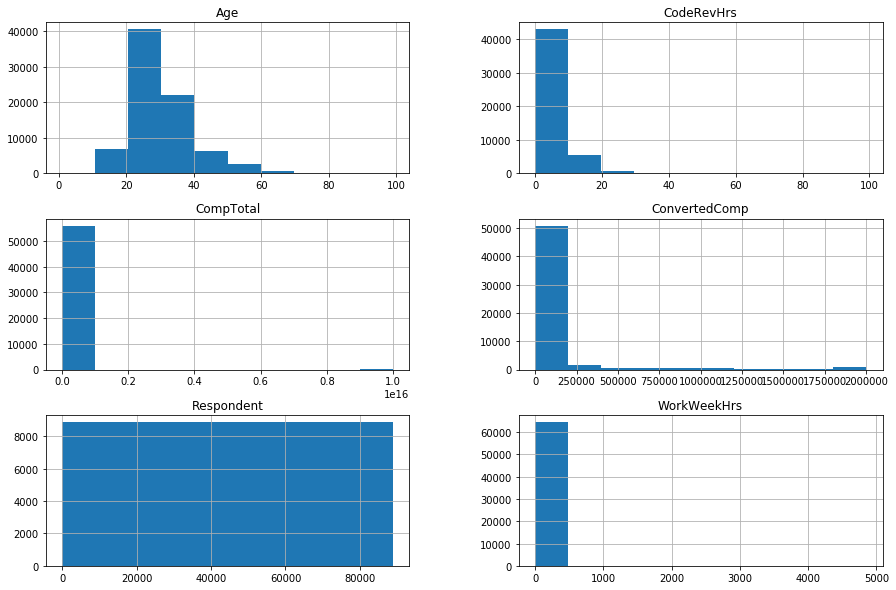

In [7]:
df.hist(figsize=(15, 10));

The survey aims to understand multiple aspects of jobs related to software development and data analytics. The survey data covers 88,883 reviews from 179 countries. And it consists of categorical and quantitative variables.
According to brief statistics and histograms of the quantitative variables, it have some outliers that should be treated.

### 3. Prepare Data


#### - Which country do people use Stack Overflow the most?

In [8]:
df_country = df['Country']

I'm interested with only countries in which users live.

#### - Which languages do developers use and like?

In [9]:
df_dev_lang = df[['DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear']]
df_dev_lang = df_dev_lang.dropna(subset=['DevType'], how='any')
df_dev_lang.head()

,DevType,LanguageWorkedWith,LanguageDesireNextYear
1,"Developer, desktop or enterprise applications;...",C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL
2,"Designer;Developer, back-end;Developer, front-...",HTML/CSS,Elixir;HTML/CSS
3,"Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL
4,"Academic researcher;Developer, desktop or ente...",C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly
5,Data or business analyst;Data scientist or mac...,Java;R;SQL,Python;Scala;SQL


I want to know which languages developers work with and desire so I pick three columns: DevType, LanguageWorkedWith, LanguageDesireNextYear.
And I dropped rows which have nan values in DevType column because the developer type is a domain. 

In [10]:
ls_langs = ["Java", "JavaScript", "Python", "Kotlin", "Go", "C", "C++", "C#", "Rust", "Swift", "TypeScript"]

I picked languages that I've heard

#### - What is the most important factor related with high compensation?

In [11]:
df_numeric = df[['ConvertedComp', 'Age', 'WorkWeekHrs', 'CodeRevHrs']]
df_numeric = df_numeric.dropna()

I focused on quantitative variables related with high compensation as I think.
And I dropped rows which have at least one nan value in the columns. I couldn't use alternative values instead of missing data because a row isn't correlated with the other rows.

### 4. Data Modeling


#### - Which country do people use Stack Overflow the most?

In [12]:
country_vals = df_country.value_counts()
country_vals[:20]

United States         20949
India                  9061
Germany                5866
United Kingdom         5737
Canada                 3395
France                 2391
Brazil                 1948
Poland                 1922
Australia              1903
Netherlands            1852
Russian Federation     1694
Spain                  1604
Italy                  1576
Sweden                 1274
Switzerland             978
Israel                  952
Turkey                  949
Pakistan                923
Ukraine                 868
Austria                 839
Name: Country, dtype: int64

In [13]:
ratio_country = country_vals[:20]/df.shape[0]

I got ratio dataframe by counting countries and dividing total users number.

#### - Which languages do developers use and like?

In [14]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [15]:
def plot_ratio_language(df, ls_langs, title):
    study_df = total_count(df, 'language', 'count', ls_langs)
    study_df.set_index('language', inplace=True)
    plt.figure(figsize=(15,10))
    x = np.arange(len(study_df))
    y = (study_df/study_df.sum())['count'].values
    xlabel = study_df.index
    plt.bar(x, y)
    plt.xticks(x, xlabel)
    plt.xlabel('language')
    plt.ylabel('ratio')
    plt.title(title)
    plt.savefig(title + '.png')
    plt.show();

- total_count function : to get a dataframe of each look_for with the count of how often it shows up
- plot_ratio_language : to plot ratio of languages

In [16]:
df_val_lang_back_work = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, back-end")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_back_work.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [17]:
df_val_lang_front_work = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, front-end")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_front_work.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [18]:
df_val_lang_full_work = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, full-stack")]['LanguageWorkedWith'].value_counts().reset_index()
df_val_lang_full_work.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [19]:
df_val_lang_back_desire = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, back-end")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_back_desire.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [20]:
df_val_lang_front_desire = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, front-end")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_front_desire.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [21]:
df_val_lang_full_desire = df_dev_lang[df_dev_lang['DevType'].str.contains("Developer, full-stack")]['LanguageDesireNextYear'].value_counts().reset_index()
df_val_lang_full_desire.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

#### - What is the most important factor related with high compensation?

In [22]:
df_numeric_filter = df_numeric.loc[(df_numeric['Age'] < 70) & (df_numeric['Age'] > 10) & (df_numeric['CodeRevHrs'] < 40) & 
                                   (df_numeric['WorkWeekHrs'] < 80) & (df_numeric['ConvertedComp'] > 100) & (df_numeric['ConvertedComp'] < 200000)]

I applied some filters to eliminate outliers
 - Age : more than 10 and less than 70
 - Code Review Hours per week : less than 40
 - Work Hours per week : less than 80
 - Converted Compensation : more than 100 and less than 200000

In [23]:
def get_r_squared_score(df_x, df_y):
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .30, random_state=42) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    return "The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

- get_r_squared_score function : to get R squared score between x values and y values.

### 5. Evaluate the Results


#### - Which country do people use Stack Overflow the most?

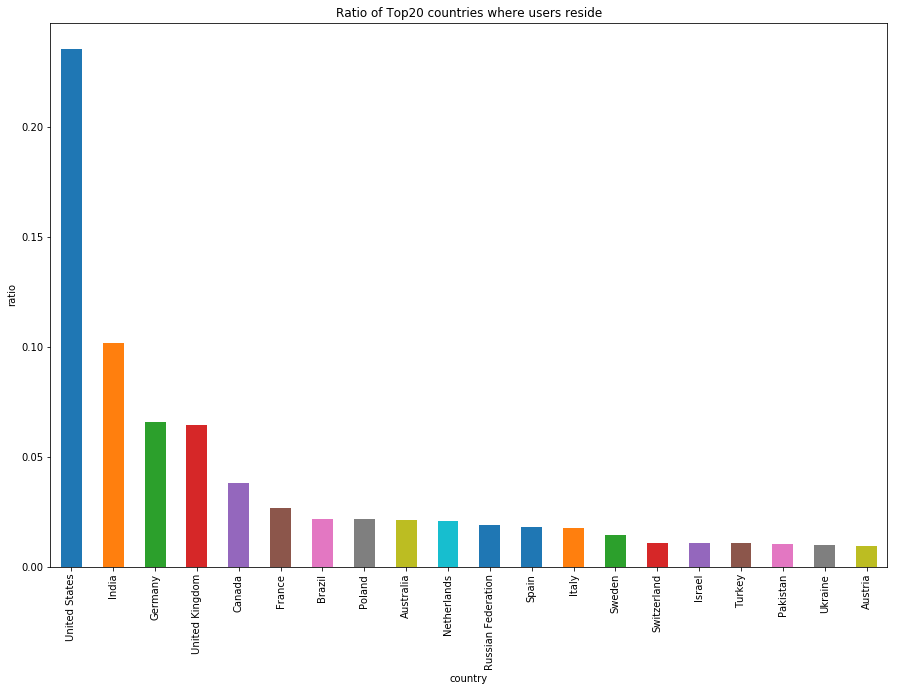

In [24]:
ratio_country.plot(kind="bar", figsize=(15, 10));
plt.title("Ratio of Top20 countries where users reside")
plt.xlabel('country')
plt.ylabel('ratio')
plt.savefig('Ratio of Top20 countries where users reside.png');

As you can see above, we can see United States has the most people who use Stack Overflow followed by India, Germany and UK. Knowing that India has highly developed technology industry, it is not surprising that India is the 2nd country where Stack overflow users reside.

#### - Which languages do developers use and like?

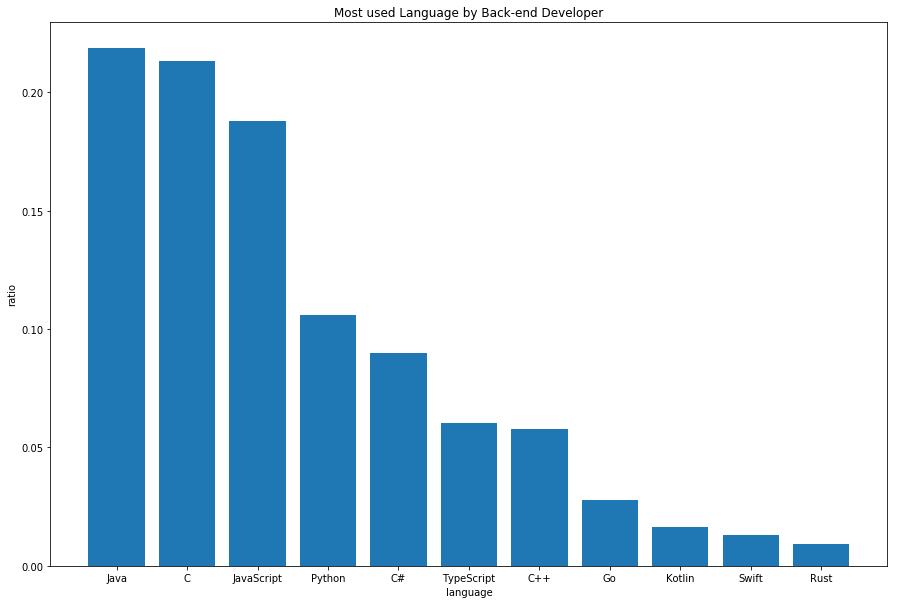

In [25]:
plot_ratio_language(df_val_lang_back_work, ls_langs, 'Most used Language by Back-end Developer')

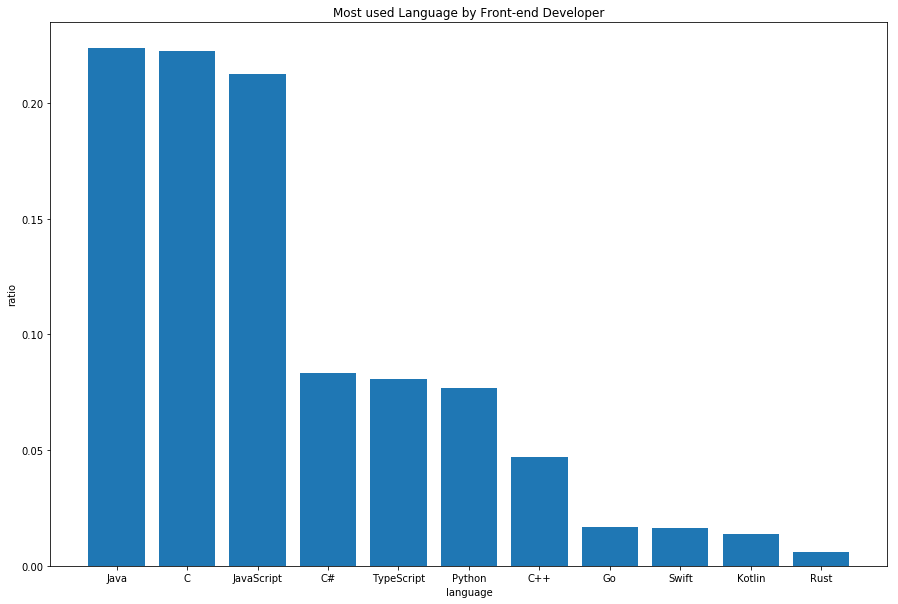

In [26]:
plot_ratio_language(df_val_lang_front_work, ls_langs, 'Most used Language by Front-end Developer')

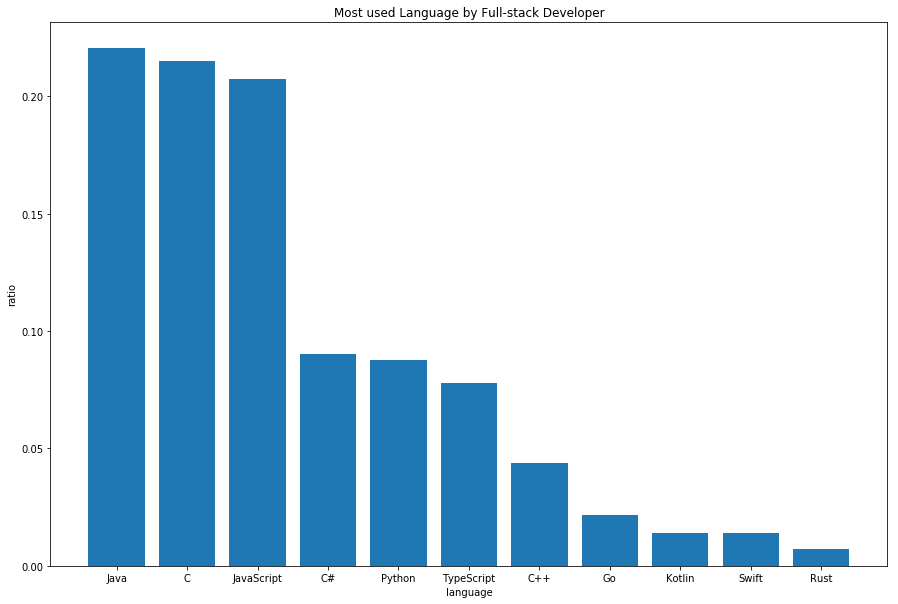

In [27]:
plot_ratio_language(df_val_lang_full_work, ls_langs, 'Most used Language by Full-stack Developer')

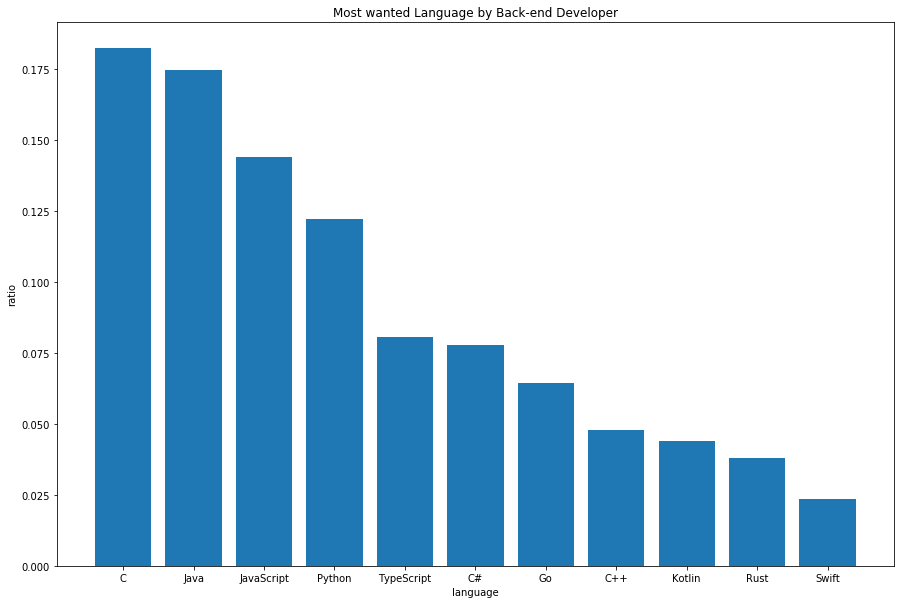

In [28]:
plot_ratio_language(df_val_lang_back_desire, ls_langs, 'Most wanted Language by Back-end Developer')

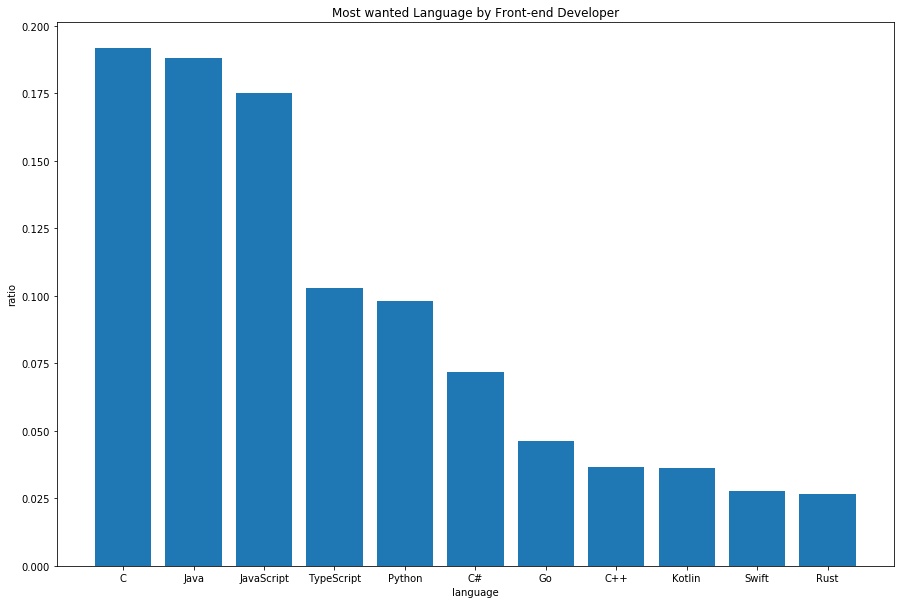

In [29]:
plot_ratio_language(df_val_lang_front_desire, ls_langs, 'Most wanted Language by Front-end Developer')

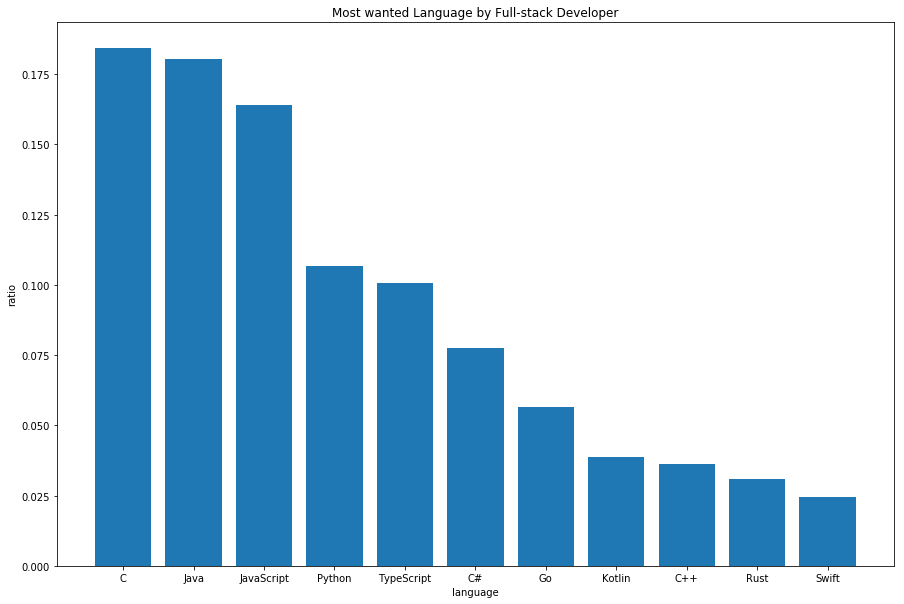

In [30]:
plot_ratio_language(df_val_lang_full_desire, ls_langs, 'Most wanted Language by Full-stack Developer')

Java, C and JavaScript are the most commonly used languages for all 3 types of developers. But compared to the fact that Back-end developers prefer Python than C#, Front-end and Full-stack developers use C# more.
Languages that developers want to use is very similar to languages that are currently used. A noticeable fact is more developers became to want to use Python and Typescript languages.

#### - What is the most important factor related with high compensation?

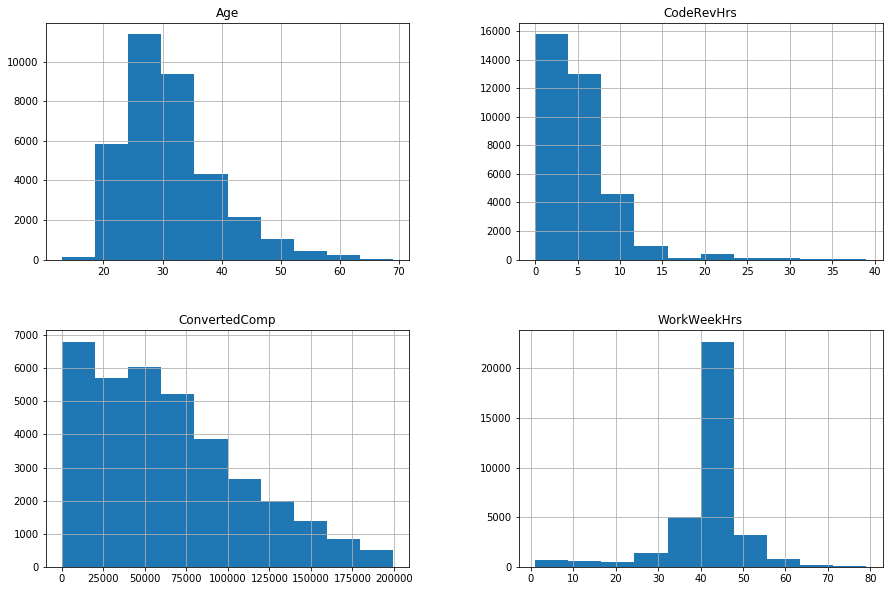

In [31]:
df_numeric_filter.hist(figsize=(15, 10))
plt.savefig('histogram.png');

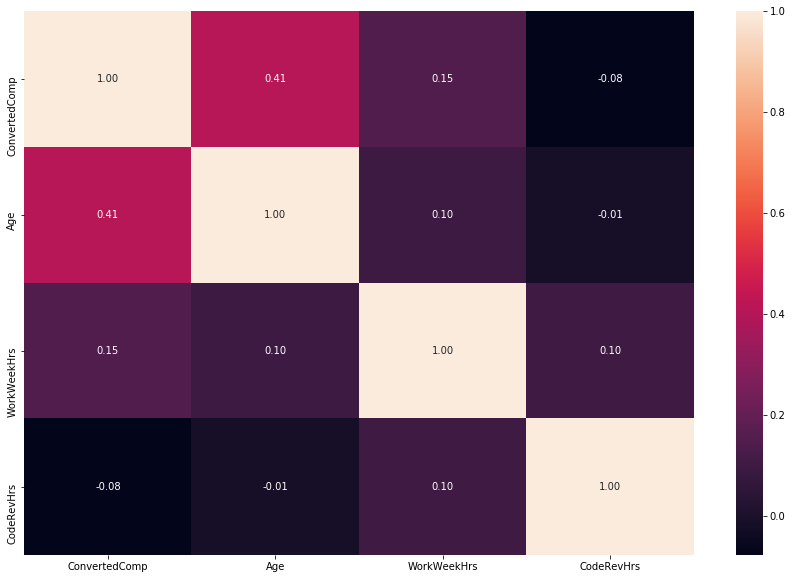

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_numeric_filter.corr(), annot=True, fmt=".2f")
plt.savefig('correlation.png');

In [33]:
get_r_squared_score(df_numeric_filter[['Age', 'WorkWeekHrs', 'CodeRevHrs']], df_numeric_filter['ConvertedComp'])

'The r-squared score for your model was 0.18940993534933992 on 10496 values.'

Refer to the graphs above, developers in the age of twenties and thirties are the most in the world. And most of developers work 40 to 50 hours.
According to correlation map of factors, the age factor is the most correlated with the compensation having 0.41 coefficient.
After applying linear regression analysis with the variables, I got a r-squared score which is around 0.19.